In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

# Load dataframes

In [2]:
res = pd.read_csv('res.csv')
df = pd.read_csv('df.csv')
# dosages = np.loadtxt('dosages.txt')

       Unnamed: 0  Frame  Position  Membrane signal  Cytoplasmic signal
0               0      0         0     11611.168161         3432.114217
1               1      0         1     11557.536357         3432.114217
2               2      0         2     11788.554175         3432.114217
3               3      0         3     11776.053542         3432.114217
4               4      0         4     11760.416033         3432.114217
...           ...    ...       ...              ...                 ...
10695          95    106        95      2511.190116         3939.146322
10696          96    106        96      2522.094256         3939.146322
10697          97    106        97      2407.477064         3939.146322
10698          98    106        98      2352.521753         3939.146322
10699          99    106        99      2403.736797         3939.146322

[10700 rows x 5 columns]
     Unnamed: 0  Frame                                               Path  \
0             0      0  /Users/bl

In [3]:
res_grouped = res.sort_values('Position').groupby('Frame')
df['mem_conc'] = res_grouped.apply(lambda x: bounded_mean_1d(x['Membrane signal'], [0.85, 0.15]))
df['cyt_conc'] = res_grouped.apply(lambda x: bounded_mean_1d(x['Cytoplasmic signal'], [0.85, 0.15]))

# Cyt vs mem

<IPython.core.display.Javascript object>


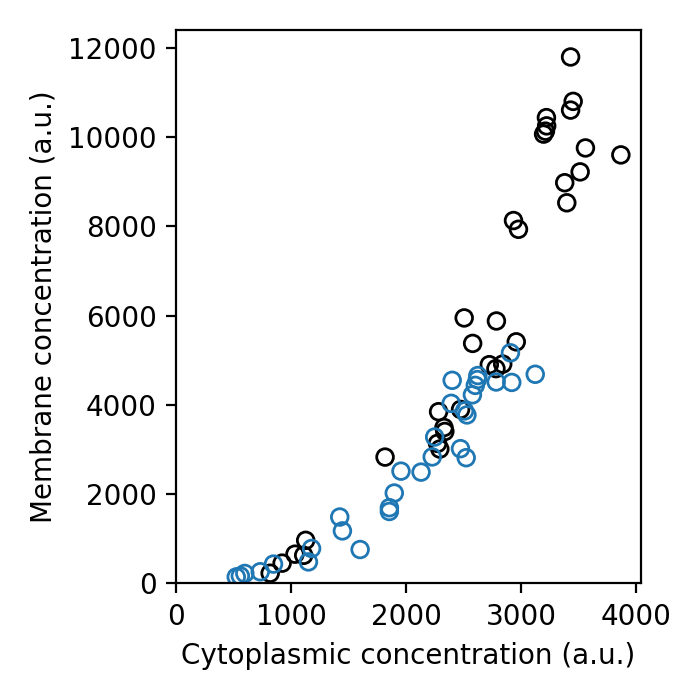

In [13]:
fig, ax = plt.subplots()
x = df['cyt_conc']
y = df['mem_conc']
ax.scatter(x[df.Line == 'lp637'], y[df.Line == 'lp637'], facecolors='none', edgecolors='k')
ax.scatter(x[df.Line == 'nwg201'], y[df.Line == 'nwg201'], facecolors='none', edgecolors='tab:blue')
# ax.scatter(x[df.Line == 'n2b'], y[df.Line == 'n2b'], c='g')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel('Cytoplasmic concentration (a.u.)')
ax.set_ylabel('Membrane concentration (a.u.)')
fig.set_size_inches(3.5, 3.5)
fig.tight_layout()

<IPython.core.display.Javascript object>


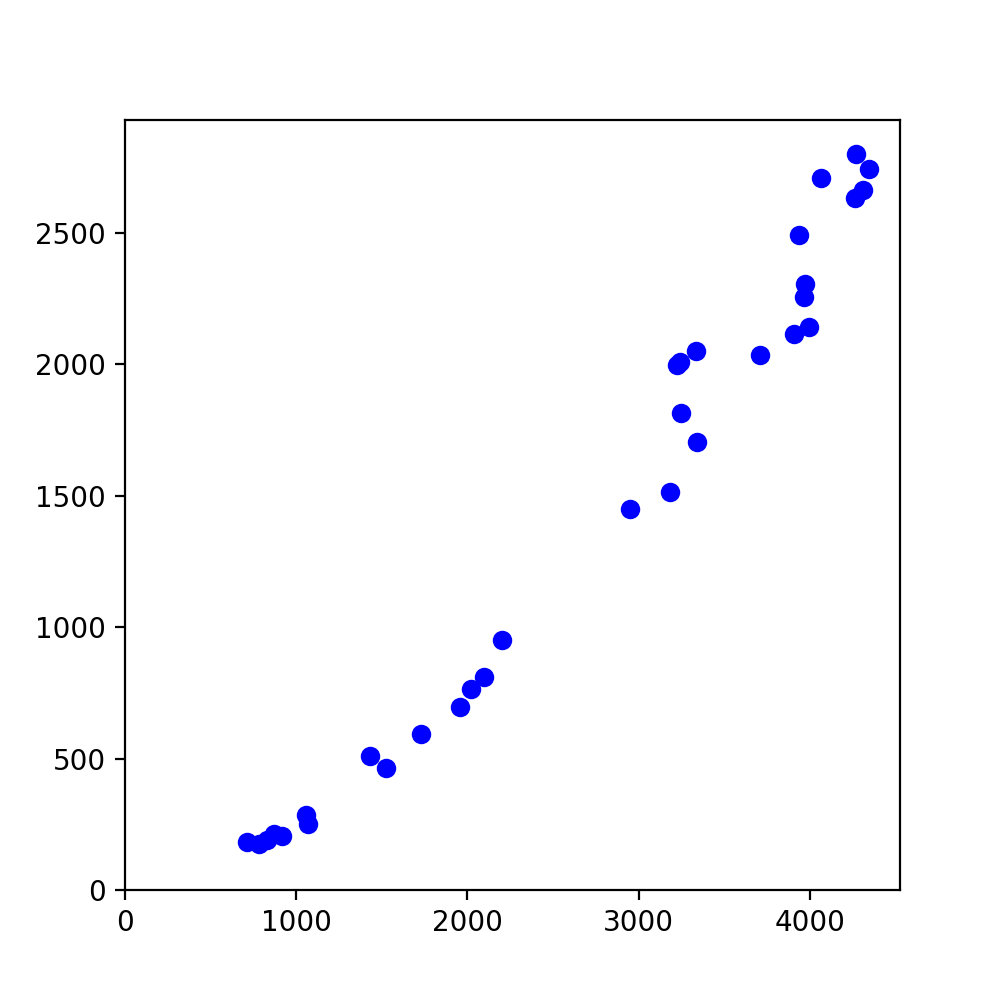

In [14]:
fig, ax = plt.subplots()
ax.scatter(x[df.Line == 'nwg246'], y[df.Line == 'nwg246'], c='b')
# ax.scatter(x[df.Line == 'nwg240'], y[df.Line == 'nwg240'], c='b')
# ax.scatter(x[df.Line == 'n2b'], y[df.Line == 'n2b'], c='g')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
fig.set_size_inches(5,5)

# Dosage vs ratio

<IPython.core.display.Javascript object>


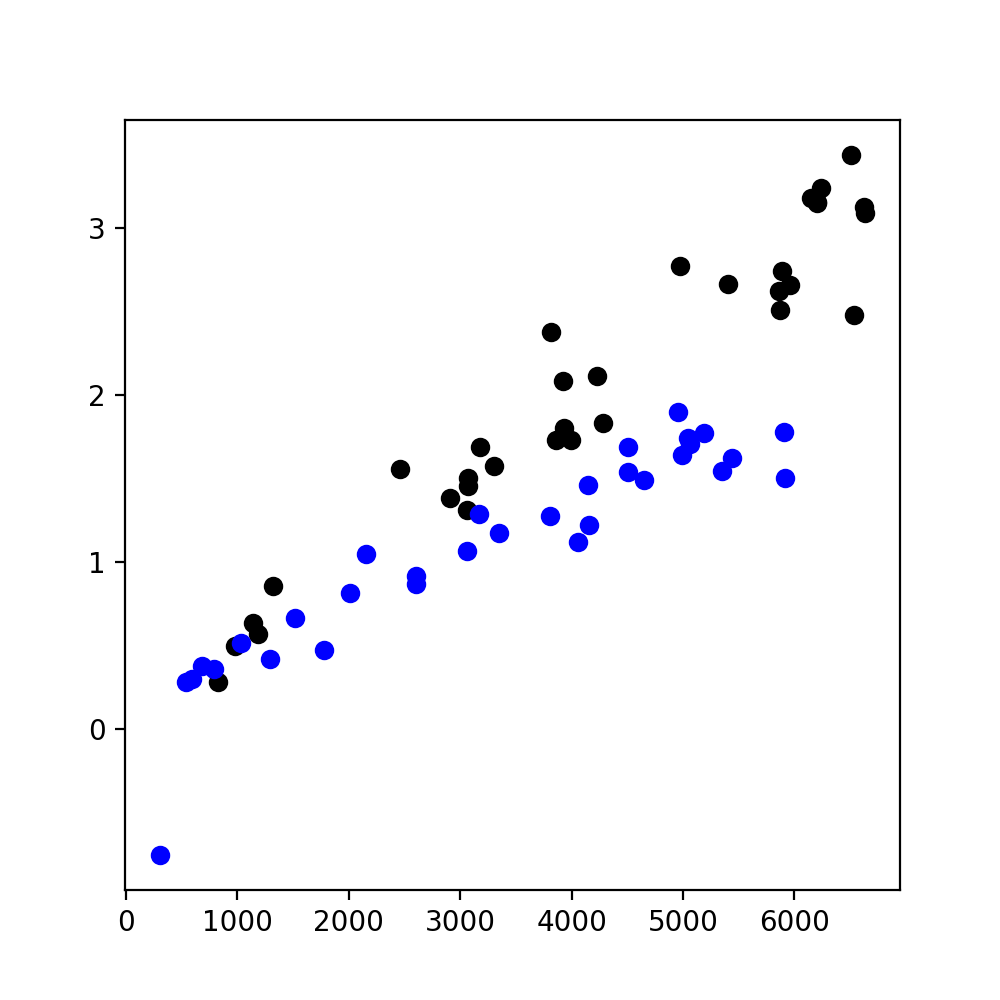

In [15]:
x = dosages
y = df['mem_conc'] / df['cyt_conc']

fig, ax = plt.subplots()
ax.scatter(x[df.Line == 'lp637'], y[df.Line == 'lp637'], c='k')
ax.scatter(x[df.Line == 'nwg201'], y[df.Line == 'nwg201'], c='b')
fig.set_size_inches(5,5)

<IPython.core.display.Javascript object>


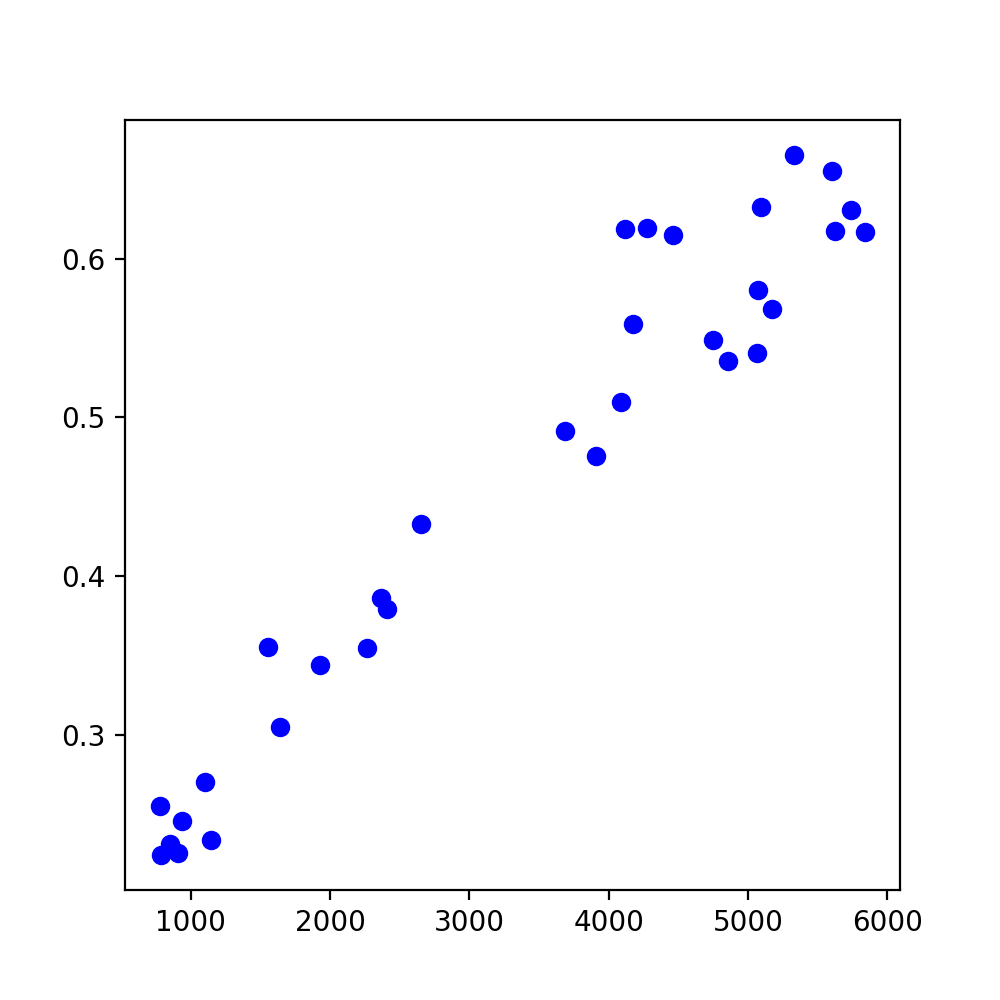

In [16]:
fig, ax = plt.subplots()
ax.scatter(x[df.Line == 'nwg246'], y[df.Line == 'nwg246'], c='b')
fig.set_size_inches(5,5)

<IPython.core.display.Javascript object>


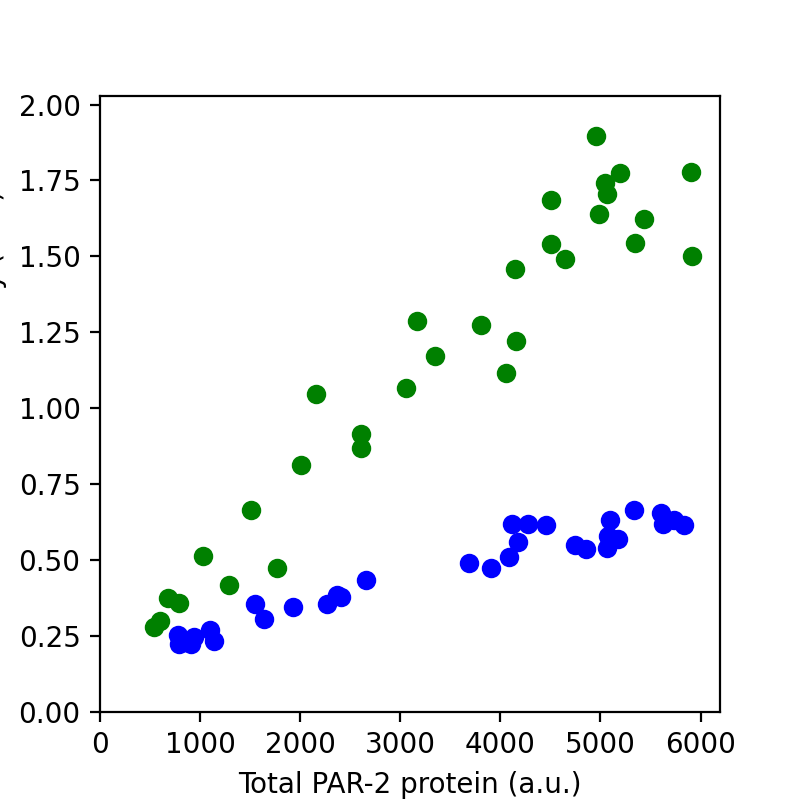

In [17]:
fig, ax = plt.subplots()
ax.scatter(x[df.Line == 'nwg201'], y[df.Line == 'nwg201'], c='g')
ax.scatter(x[df.Line == 'nwg246'], y[df.Line == 'nwg246'], c='b')
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.set_xlabel('Total PAR-2 protein (a.u.)')
ax.set_ylabel('PAR-2 membrane affinity (a.u.)')
fig.set_size_inches(4,4)

# Membrane vs ratio

<IPython.core.display.Javascript object>


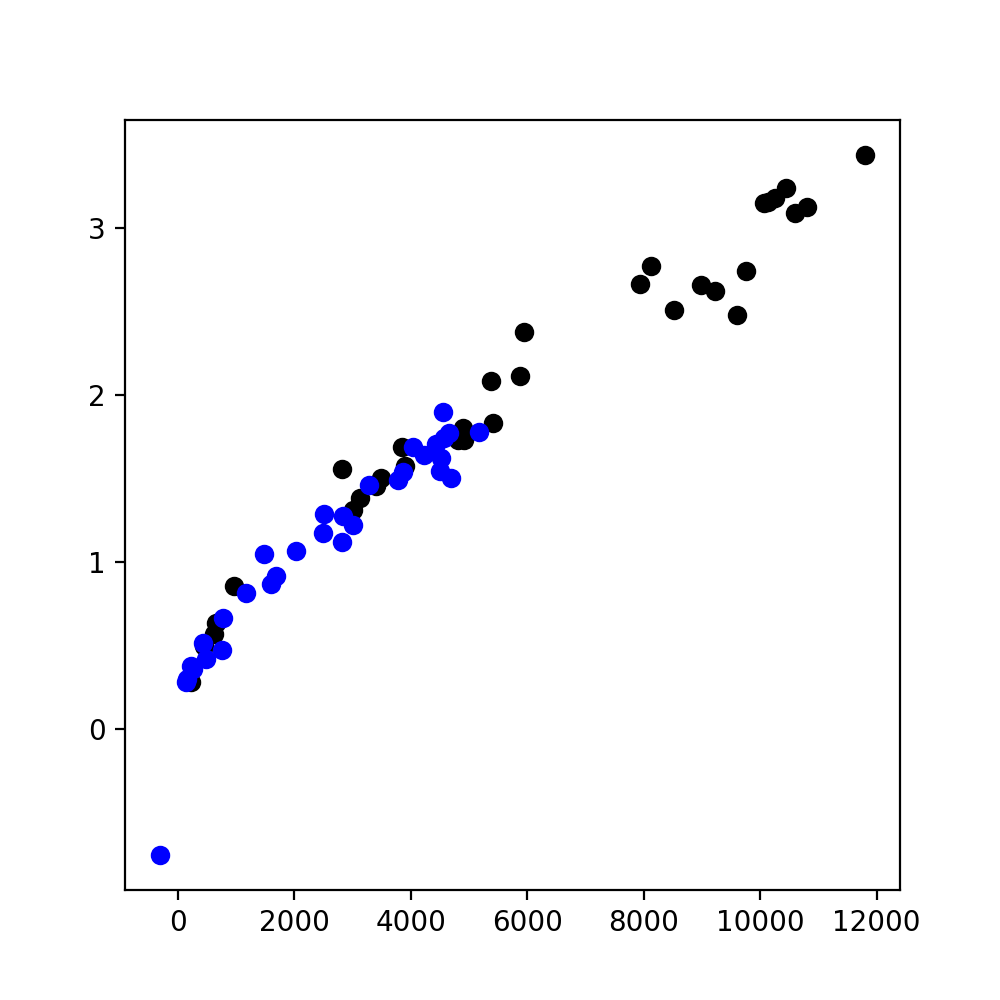

In [18]:
x = df['mem_conc']
y = df['mem_conc'] / df['cyt_conc']

fig, ax = plt.subplots()
ax.scatter(x[df.Line == 'lp637'], y[df.Line == 'lp637'], c='k')
ax.scatter(x[df.Line == 'nwg201'], y[df.Line == 'nwg201'], c='b')
fig.set_size_inches(5,5)

<IPython.core.display.Javascript object>


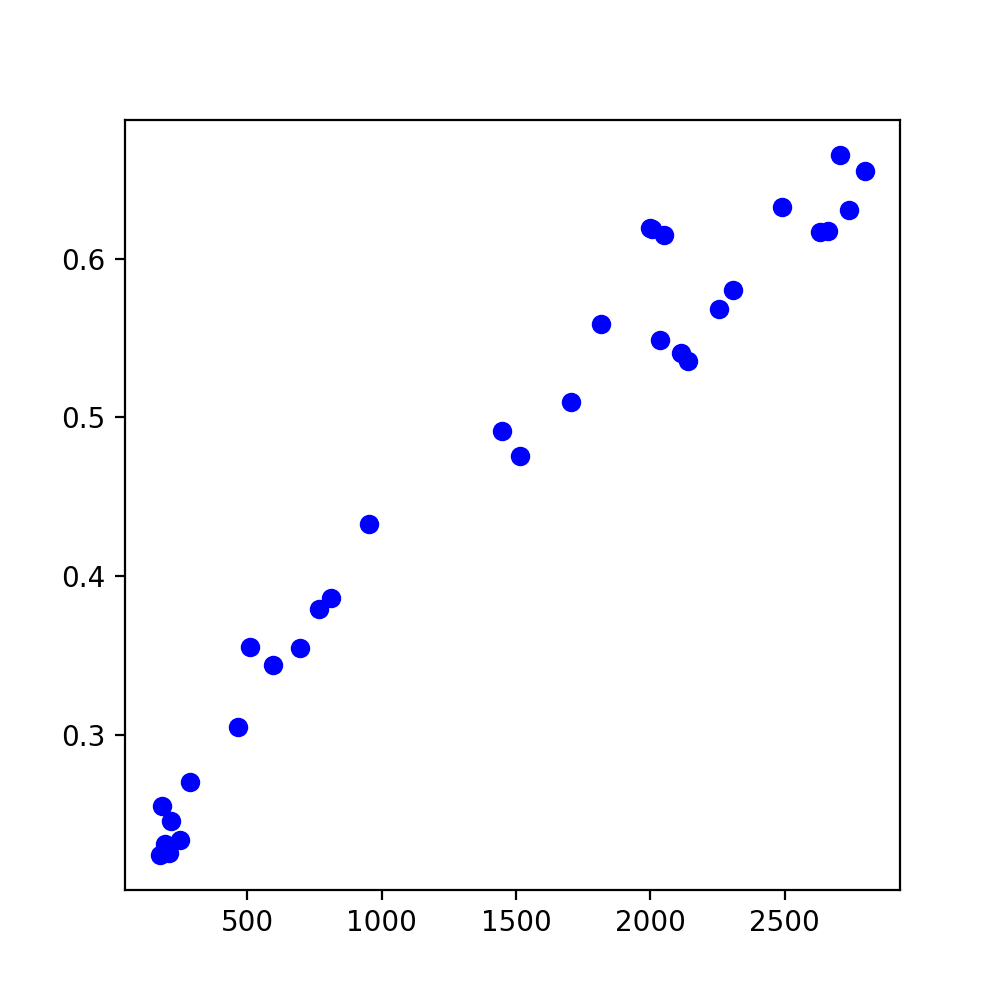

In [19]:
fig, ax = plt.subplots()
ax.scatter(x[df.Line == 'nwg246'], y[df.Line == 'nwg246'], c='b')
fig.set_size_inches(5,5)

<IPython.core.display.Javascript object>


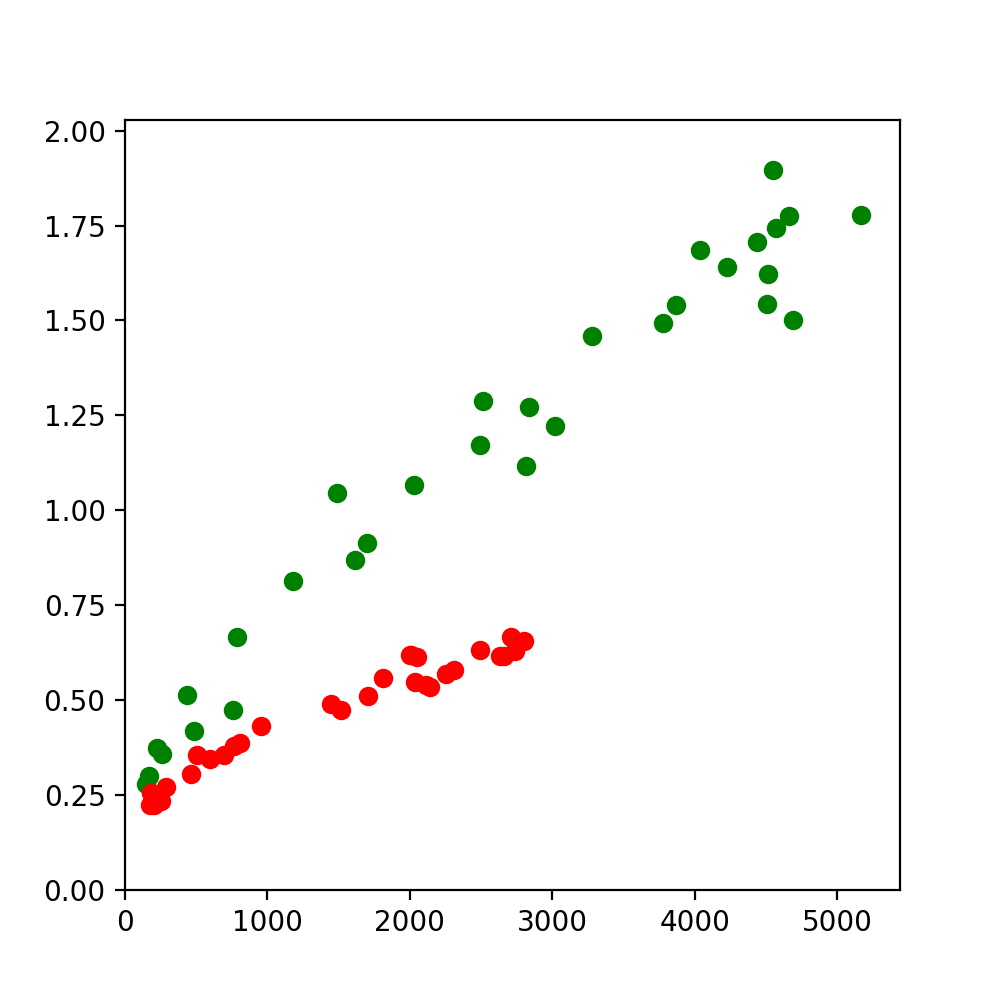

In [20]:
fig, ax = plt.subplots()
# ax.scatter(x[df.Line == 'lp637'], y[df.Line == 'lp637'], c='k')
ax.scatter(x[df.Line == 'nwg201'], y[df.Line == 'nwg201'], c='g')
ax.scatter(x[df.Line == 'nwg246'], y[df.Line == 'nwg246'], c='r')
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
fig.set_size_inches(5,5)

<IPython.core.display.Javascript object>


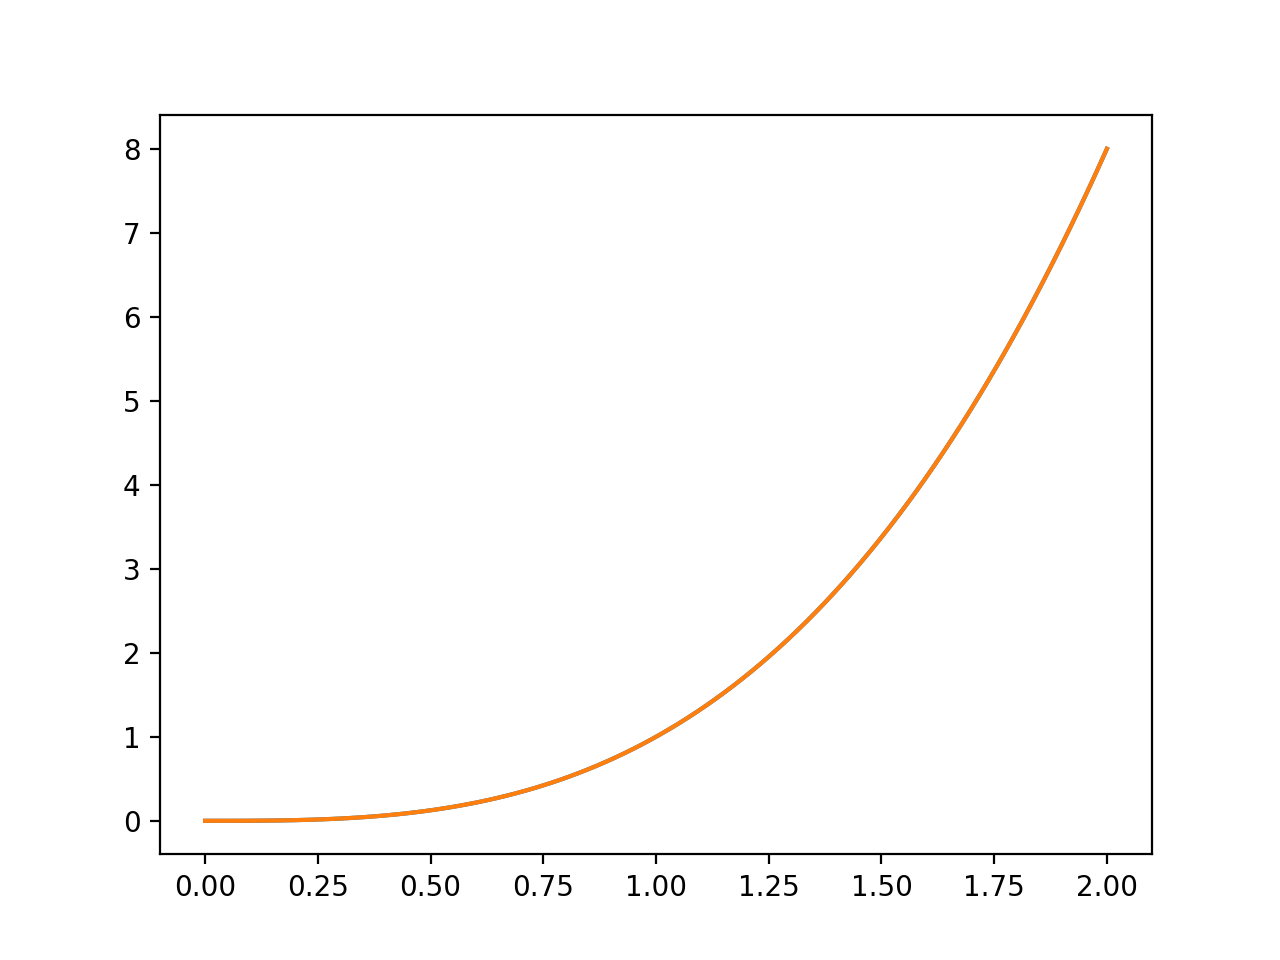

In [21]:
exponent = 3

fig, ax = plt.subplots()
ax.plot(np.linspace(0,2,100), np.linspace(0,2,100) ** exponent)
ax.plot(np.linspace(0,4,100) / 2, (np.linspace(0,4,100) ** exponent)/(2 ** exponent))